# 3. 手書き文字(数字)認識の実践

In [1]:
# coding: utf-8
'''
    初期設定箇所。このセルは変更せずに実行してください
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt #グラフの描画
import os, sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer
from common.functions import sigmoid

## 3-1. MNISTデータの表示

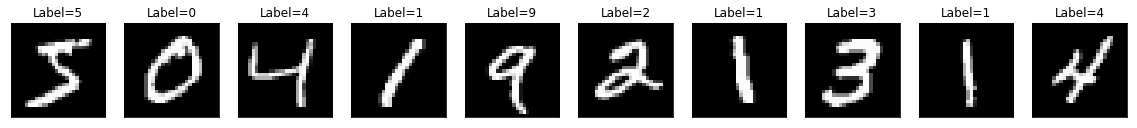

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True) # MNISTデータの読み込み
'''
    x_train: トレーニング用データ             (60000, 784)
    t_train: トレーニング用データの正解ラベル (60000,)
    x_test: テスト用データ                    (10000, 784)
    t_test: テスト用データの正解ラベル        (10000,)
'''
number_images = 10 # 最初の10枚だけ読み込む
fig = plt.figure(figsize=(20, 2))
for number in range(number_images):
    fig.add_subplot(1,number_images,number+1)
    plt.title("Label={0}".format(t_train[number])) # 正解ラベルの表示
    plt.imshow(np.array(x_train[number].reshape(28, 28)),cmap='gray', aspect="equal") # 画像を28x28に成形したうえで描画する
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off") # 軸を削除

## 3-2. ニューラルネットワークの学習

train loss:2.37119122602 === epoch:1, train acc:0.102183333333, test acc:0.101 ===
train loss:2.21081996963 === epoch:2, train acc:0.3832, test acc:0.3876 ===
train loss:2.11110319183 === epoch:3, train acc:0.52785, test acc:0.5344 ===
train loss:1.89547055165 === epoch:4, train acc:0.6596, test acc:0.6692 ===
train loss:1.59657191042 === epoch:5, train acc:0.673866666667, test acc:0.6799 ===
train loss:1.37920306507 === epoch:6, train acc:0.743316666667, test acc:0.7528 ===
train loss:1.12747126603 === epoch:7, train acc:0.766016666667, test acc:0.7735 ===
train loss:0.939207054615 === epoch:8, train acc:0.787916666667, test acc:0.7934 ===
train loss:0.905860885242 === epoch:9, train acc:0.8067, test acc:0.8107 ===
train loss:0.725953790732 === epoch:10, train acc:0.81935, test acc:0.8224 ===
train loss:0.786063793983
=============== Final Test Accuracy ===============
test acc:0.8343


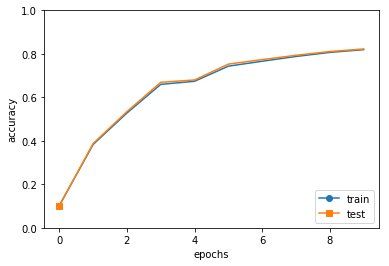

In [3]:
'''
    以下の4行が学習の処理を行っている箇所
    60,000枚から100枚の画像をランダムに抽出し損失関数の値を算出、train lossとして表示
    上記を600回繰り返すごとにepoch +1、トレーニング用およびテスト用データそれぞれについての精度を表示
'''
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[50, 100], output_size=10, activation="sigmoid")
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=10, mini_batch_size=100, optimizer="SGD", optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

'''
    epochを10まで繰り返し、結果をグラフ表示
'''
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 3-3. 学習したニューラルネットによる推論

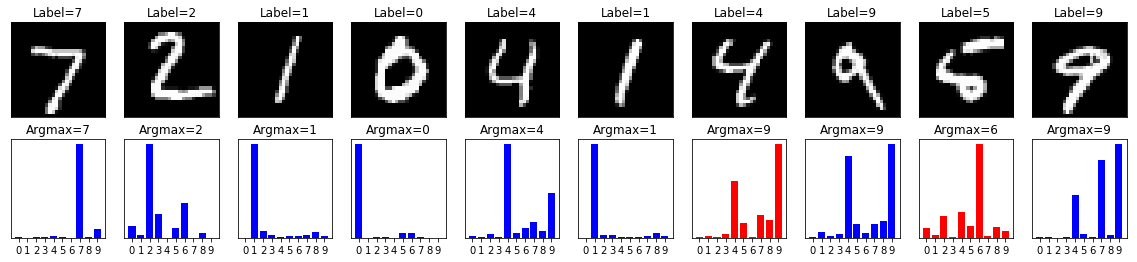

In [4]:
'''
    先ほどの学習によって(そこそこに)最適化されたパラメータを読み込む
'''
W1, W2, W3 = network.params['W1'].T, network.params['W2'].T, network.params['W3'].T
b1, b2, b3 = network.params['b1'], network.params['b2'], network.params['b3']

'''
    テストデータの最初の10枚を学習済のニューラルネットワークに流し込んで計算、推論の結果を表示
'''
fig = plt.figure(figsize=(20, 4))
for ittr in range(10):

    z1 = sigmoid( np.dot(W1, x_test[ittr]) + b1 )
    z2 = sigmoid( np.dot(W2, z1) + b2 )
    z3 = np.dot(W3, z2) + b3

    if np.argmax(z3) == t_test[ittr]:
        t_color = "blue"
    else:
        t_color = "red"

    fig.add_subplot(2, 10 , ittr+1)
    plt.title("Label={0}".format(t_test[ittr])) # 正解ラベルの表示
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
    plt.imshow(np.array(x_test[ittr].reshape(28, 28)),cmap='gray', aspect="equal")
    
    fig.add_subplot(2, 10, ittr+11)
    plt.bar(np.array(range(10)), np.exp(z3)/np.sum(np.exp(z3)), color=t_color)
    plt.tick_params(labelleft="off", left="off")
    plt.title("Argmax={0}".format(np.argmax(z3))) # 推論結果の表示
    plt.xticks(range(10))
    
plt.show()

## 3-4 学習後の重みパラメータ(W1, W2, W3)を見てみる

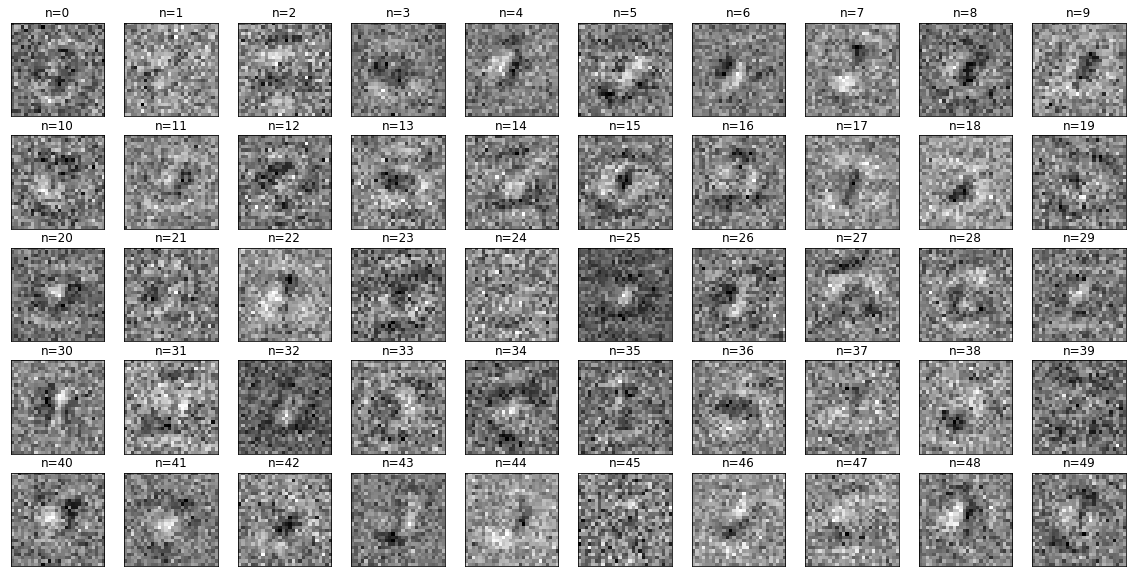

In [5]:
# W1の各列の要素を28x28に図示
fig = plt.figure(figsize=(20, 10))
for ittr in range(50):
    fig.add_subplot(5, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W1[ittr].reshape(28,28)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()

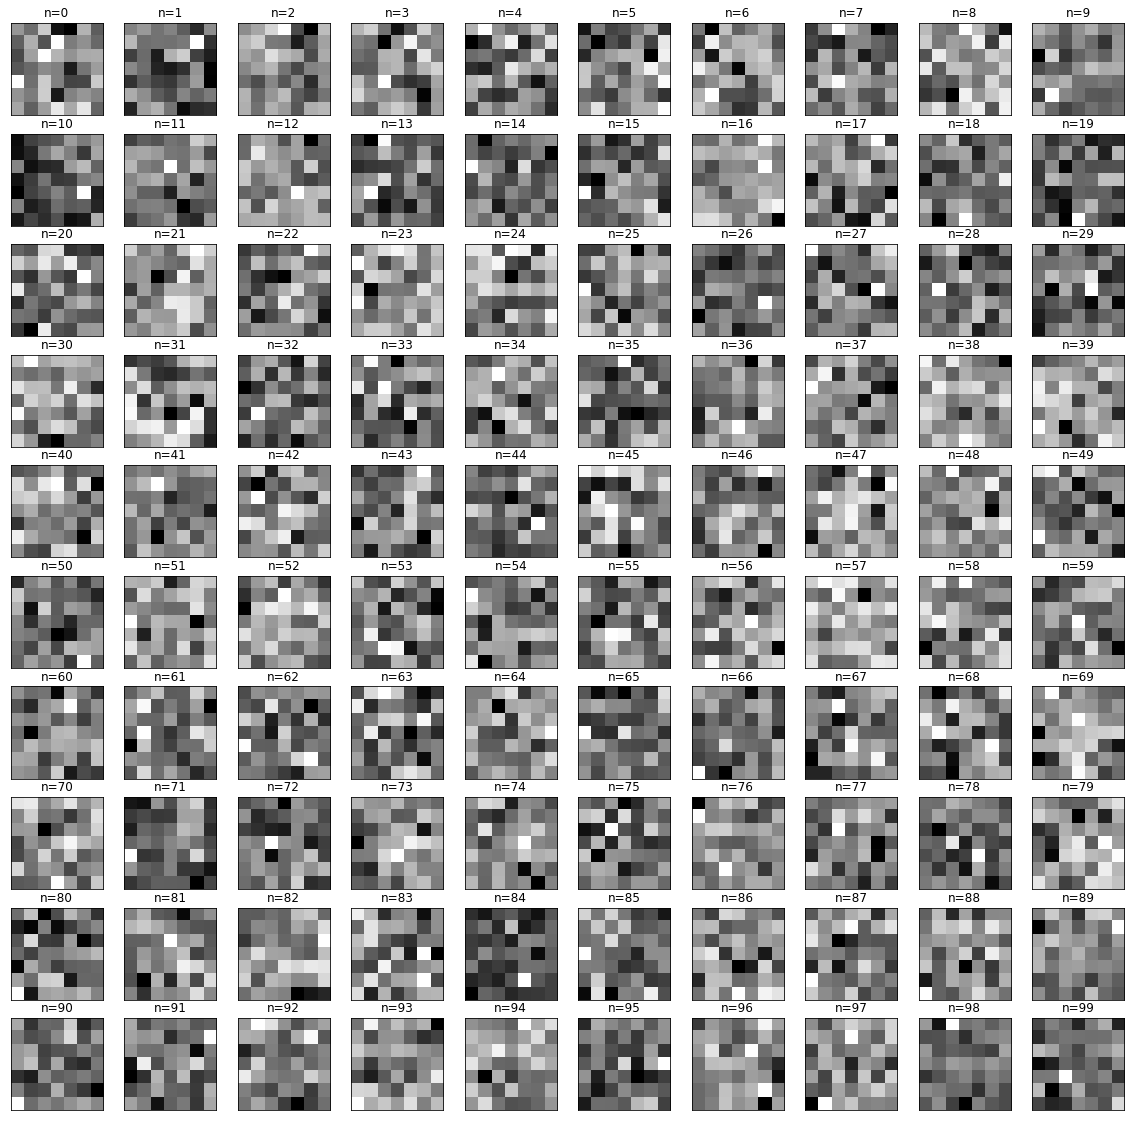

In [6]:
# W2の各列の要素を7x7に図示
fig = plt.figure(figsize=(20, 20))
W2t = np.delete(W2, 0, 1) # 7x7にしたいので1行減らす
for ittr in range(100):
    fig.add_subplot(10, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W2t[ittr].reshape(7,7)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()

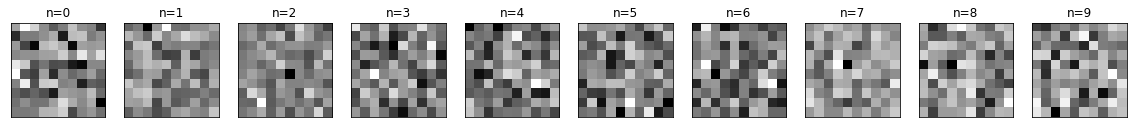

In [7]:
# W3の各列の要素を10x10に図示
fig = plt.figure(figsize=(20, 5))
for ittr in range(10):
    fig.add_subplot(1, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W3[ittr].reshape(10,10)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()